Let's create a neural network for the MNIST dataset in a Google Colab notebook using Python, TensorFlow, and Keras.

**Importing Necessary Libraries**

In [1]:
# Checking if TensorFlow is installed or not
! pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Exploratory Data Analysis (EDA)**

In [4]:
#Checking Shape of the MNIST Dataset
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Testing Images Shape:", test_images.shape)
print("Testing Labels Shape:", test_labels.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Images Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


These shapes indicate that there are 60,000 training images and 10,000 test images, each with a dimension of 28x28 pixels. The labels for both training and test sets are arrays with 60,000 and 10,000 elements, respectively, corresponding to the labels for each image.

In [5]:
# Checking for missing values
missing_values = np.isnan(train_images).sum()
print(f"Number of missing values in the dataset: {missing_values}")

Number of missing values in the dataset: 0


In [6]:
# Checking the array matrix of the training images
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
# Checking the array of the training labels
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The label of this image is :5


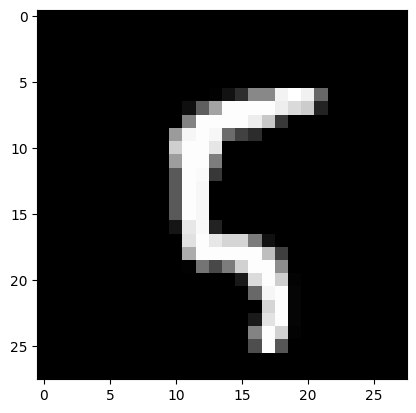

In [8]:
# Checking the label image of one of the labels
plt.imshow(train_images[100], cmap="gray")
print(f"The label of this image is :{train_labels[100]}")

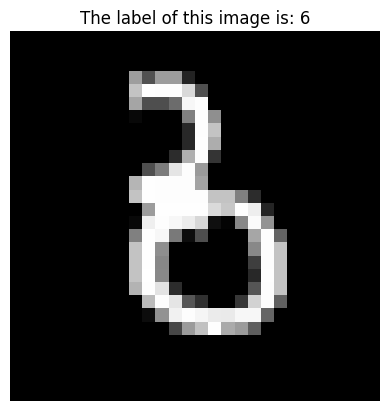

In [9]:
# Display a specific image and its corresponding label based on the random_num index. from the MNIST dataset

#np.random.randint(0, 60000) - randomly pick an index

random_num = 15450  # Replace with your desired index

if 0 <= random_num < len(train_images):
    plt.imshow(train_images[random_num], cmap="gray")
    plt.title(f"The label of this image is: {train_labels[random_num]}")
    plt.axis('off')  # Turn off axis labels for image
    plt.show()
else:
    print("Array has only", len(train_images), "images")

In [4]:
# Checking class distribution

class_distribution = pd.DataFrame(train_labels).value_counts().sort_index()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


<Axes: xlabel='0'>

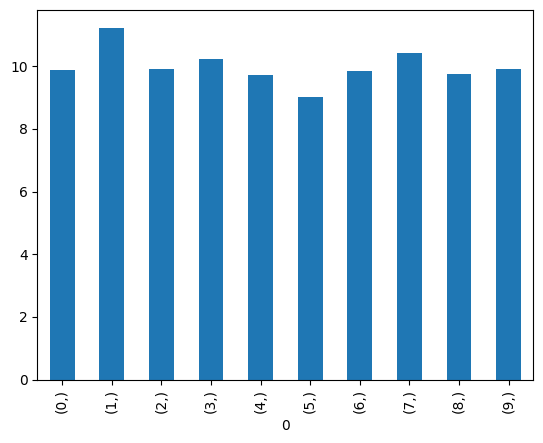

In [11]:
# Visualizing class distribution

pd.DataFrame(train_labels).value_counts(normalize=True).sort_index().mul(100).plot.bar()

This visualization shows the counts for each digit class (0-9), providing a clear representation of the distribution of digits in the dataset. Each bar on the plot corresponds to a digit class, and the height of the bar indicates the count of examples for that particular digit class.

Here, all classes are relatively balanced with approximately an equal number of examples for each digit.



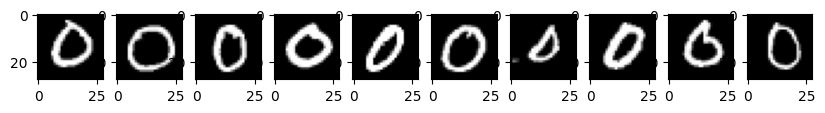

In [12]:
# Plotting 10 random images of ZERO
digit = 0
index = np.random.choice(np.where(train_labels == digit)[0], 10)
plt.figure(figsize=(10, 8))
for e,i in enumerate(index):
  plt.subplot(1, 10, e+1)
  plt.imshow(train_images[i], cmap="gray")

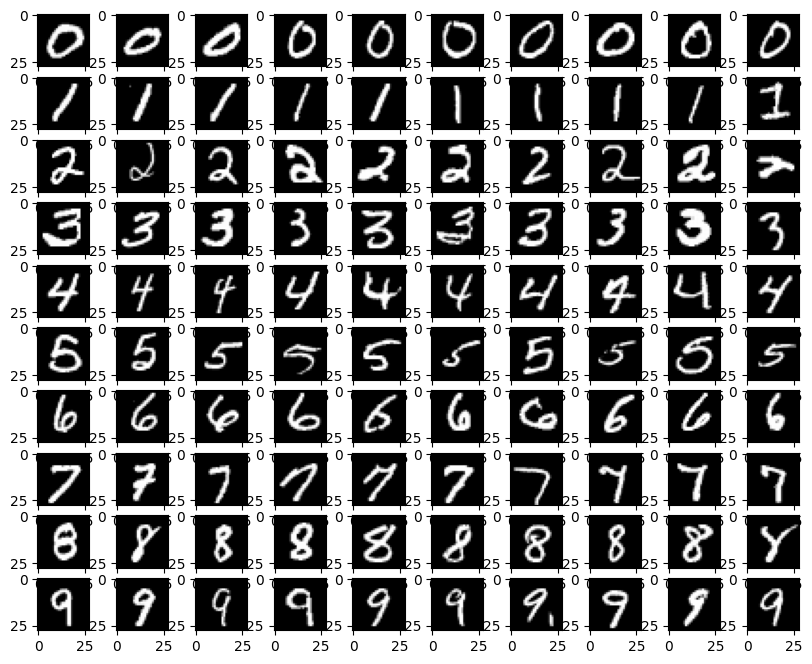

In [13]:
# Plotting 10 random images of all the training labels

plt.figure(figsize=(10, 8))
for d in np.arange(0, 10):
  digit = d
  index = np.random.choice(np.where(train_labels == digit)[0], 10)
  for e,i in enumerate(index):
    plt.subplot(10, 10, d*10 + e+1)
    plt.imshow(train_images[i], cmap="gray")

**PRE-PROCESSING**

In [5]:
# Pre processing of Input data
print(train_images.max(), train_images.min())

255 0


The pixel values in the MNIST dataset range from 0 to 255. Normalizing these values to a range between 0 and 1 helps in faster convergence during model training. This is achieved by dividing each pixel value by 255.



In [6]:
# Normalizing pixel values to be between 0 and 1
train_images = train_images / 255.0

In [7]:
# Checking for normalised values
train_images[0].min(), train_images[0].max()

(0.0, 1.0)

All the values have been normalised in the range between 0 and 1

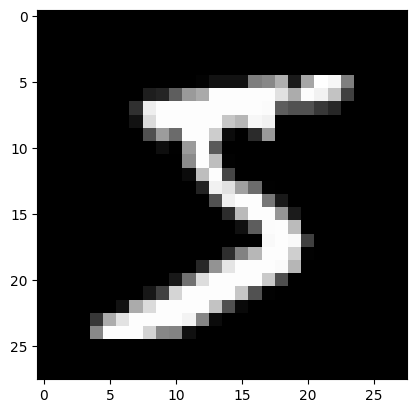

In [17]:
#Checking the training images again
plt.imshow(train_images[0], cmap="gray")

In [8]:
# Convert labels to categorical using one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)

**Building the Neural Network Model**

In [9]:
# Importing the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [10]:
# Create a sequential model
model = Sequential()

# Add a Flatten layer to transform input shape to 1D array
model.add(Flatten(input_shape=(28, 28)))

# Add a dense layer with 100 neurons and ReLU activation function
model.add(Dense(100, activation='relu'))

# Add the output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer and appropriate loss and metrics
model.compile(optimizer=SGD(learning_rate=0.01),  # Back Propagation
              loss='categorical_crossentropy', # Error Calculation
              metrics=['accuracy'])


# Display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training the Model**

In [11]:
# Train the model using training data
history = model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 3s 6ms/step - loss: 1.1853 - accuracy: 0.7219 - val_loss: 0.6281 - val_accuracy: 0.8583
Epoch 2/15
480/480 [==============================] - 3s 6ms/step - loss: 0.5542 - accuracy: 0.8629 - val_loss: 0.4428 - val_accuracy: 0.8899
Epoch 3/15
480/480 [==============================] - 3s 5ms/step - loss: 0.4390 - accuracy: 0.8847 - val_loss: 0.3791 - val_accuracy: 0.9008
Epoch 4/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3879 - accuracy: 0.8952 - val_loss: 0.3453 - val_accuracy: 0.9070
Epoch 5/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3574 - accuracy: 0.9018 - val_loss: 0.3237 - val_accuracy: 0.9120
Epoch 6/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3361 - accuracy: 0.9075 - val_loss: 0.3071 - val_accuracy: 0.9153
Epoch 7/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3197 - accuracy: 0.9114 - val_loss: 0.2950 - val_accuracy: 0.9181
Epoch 

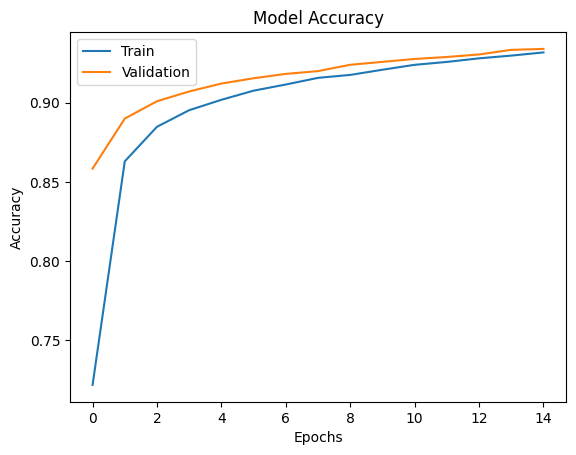

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

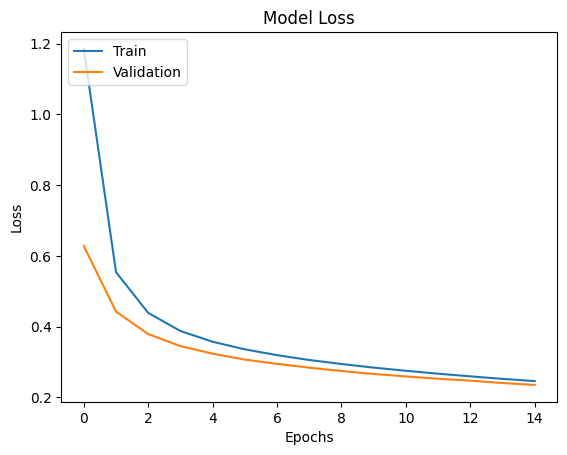

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

 Overall, the training results indicate that the model is performing well and learning effectively from the data. The convergence of both training and validation metrics (loss and accuracy) suggests that the model is able to generalize to unseen data, achieving around 93% accuracy on the validation set by the end of 15 epochs.

**TESTING THE MODEL**

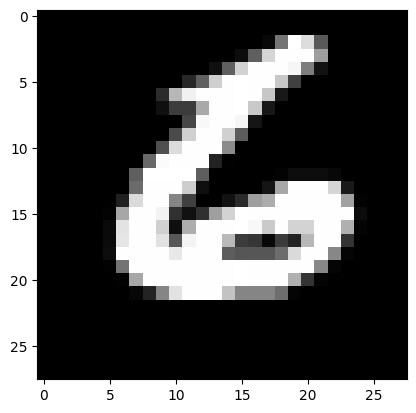

In [13]:
# Checking the label of the 9999th image
test_image9999 = test_images[9999]
plt.imshow(test_image9999, cmap="gray")

The label of the image at 999th index is 9('nine')

In [14]:
# Normalising this image
test_image9999 = test_image9999 / 255.0

In [15]:
# Checking the shape of this image
test_image9999.shape

(28, 28)

The output (28, 28) indicates that the shape of test_image is 28x28 pixels



In [16]:
# Checking the shape of the input of the model
model.input_shape # num of images, height, width

(None, 28, 28)

The model.input_shape shows (None, 28, 28). The None dimension typically represents the batch size (the number of samples), which is not specified here. The subsequent (28, 28) indicates the height and width dimensions of the input images expected by the model.

In [17]:
# Adding and extra dimension to the test image along axis 0
test_image9999 = np.expand_dims(test_image9999, axis=0)

In [18]:
# Checking the new shape of the test image
test_image9999.shape

(1, 28, 28)

In [19]:
# Predicting the label of the 9999th image
model.predict(test_image9999)

1/1 [==============================] - 0s 113ms/step


array([[9.3418254e-05, 4.3045376e-09, 2.8037414e-04, 4.7164171e-08,
        1.2632036e-05, 6.6278499e-06, 9.9960476e-01, 4.5349271e-09,
        1.9943657e-06, 1.7859732e-07]], dtype=float32)

The highest probability among the predicted classes is for the digit 6, with a probability of approximately 99.96% (9.9960476e-01).

In [20]:
# Picking the highest probability
predicted_label = np.argmax(model.predict(test_image9999))
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 26ms/step
Predicted label: 6


**Conclusion:**

The neural network model, trained on the MNIST dataset, showcases robust performance in classifying handwritten digits. Throughout the training process:

Training Progress: The model underwent training for 15 epochs, steadily improving its accuracy and decreasing the loss. Both training and validation accuracies consistently increased, reaching approximately 93% on the validation set by the end of training. This signifies the model's ability to learn and generalize from the training data.

Prediction Accuracy: Upon evaluation, the model correctly identified the handwritten digit in the input image, predicting it as digit 6 with high confidence (approximately 99.96%).

Performance Observation: The convergence of training and validation metrics without substantial overfitting, along with the successful prediction of unseen data, indicates the model's proficiency in recognizing handwritten digits from the MNIST dataset.

In summary, the model exhibits commendable accuracy in identifying handwritten digits, achieving reliable predictions and demonstrating its capability to generalize well to unseen data. This underscores the effectiveness of the neural network architecture and the training procedure in accurately recognizing and classifying handwritten digits from the MNIST dataset.